# Getting to know your data


In [1]:
# Import pandas
import pandas as pd

so_survey_csv="https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv"


# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
print(so_survey_df.head())

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [3]:

# Print the data type of each column
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


# Selecting specific data types


In [4]:
# Create subset of only the numeric columns
so_numeric_df_num = so_survey_df.select_dtypes(include=["int64","float64"])

# Print the column names contained in so_survey_df_num
print(so_numeric_df_num.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


# One-hot encoding and dummy variables


In [5]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [6]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=["Country"], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


# Dealing with uncommon categories


In [7]:
# Create a series out of the Country column
countries = so_survey_df["Country"]

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [8]:
# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts<10].index)

# Print the top 5 rows in the mask series
print(mask.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [9]:
# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Other            14
Name: Country, dtype: int64


<ipython-input-9-e776537d9e44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries[mask] = 'Other'


# Binarizing columns


In [10]:
# Create the Paid_Job column filled with zeros
so_survey_df["Paid_job"] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df["ConvertedSalary"]>0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0       NaN              NaN
1       1.0          70841.0
2       NaN              NaN
3       1.0          21426.0
4       1.0          41671.0


# Binning values


In [11]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [12]:
# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


# How sparse is my data?


In [13]:
# Subset the DataFrame
sub_df = so_survey_df[["Age","Gender"]]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


# Finding the missing values


In [14]:
# Print the top 10 entries of the DataFrame
print(sub_df.head(10))

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN


In [15]:
# Print the locations of the missing values
print(sub_df.head(10).isnull())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


In [16]:
# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


# Listwise deletion


In [17]:
# Print the number of rows and columns
print(so_survey_df.shape)

(999, 15)


In [18]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how="any")

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 15)


In [19]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how="any", axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 8)


In [20]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=["Gender"])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 15)


# Replacing missing values with constants


In [21]:
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64


In [22]:
# Replace missing values
so_survey_df['Gender'].fillna(value="Not Given", inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64


# Filling continuous missing values


In [23]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df["StackOverflowJobsRecommend"].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [29]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


In [24]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


# Dealing with stray characters (I)


In [25]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

In [26]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace("$","")

# Dealing with stray characters (II)


In [27]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0             NaN
2             NaN
4       £41671.00
6             NaN
8             NaN
11            NaN
13            NaN
15      £75000.00
16      £10958.00
20            NaN
22            NaN
25            NaN
27            NaN
28            NaN
29            NaN
30            NaN
34            NaN
37            NaN
38      £90000.00
41            NaN
43            NaN
44            NaN
45            NaN
47      £48955.00
48            NaN
49      £19500.00
50            NaN
52            NaN
53      £36000.00
54            NaN
          ...    
925           NaN
926           NaN
927           NaN
929           NaN
934           NaN
936           NaN
937     £63156.00
938      £8496.00
941           NaN
942           NaN
944     £75000.00
948           NaN
949           NaN
952           NaN
954           NaN
955           NaN
960           NaN
961           NaN
962     £80286.00
964    £154000.00
966           NaN
975           NaN
976           NaN
977           NaN
980       

In [28]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype("float")

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

# Method chaining


In [29]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(str)\
                              .str.replace(",","")\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype("float")
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

# What does your data look like? (I)


In [30]:
import matplotlib.pyplot as plt

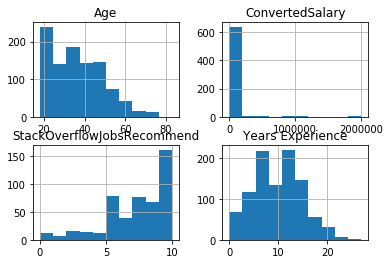

In [34]:
# Create a histogram
so_numeric_df_num.hist()
plt.show()

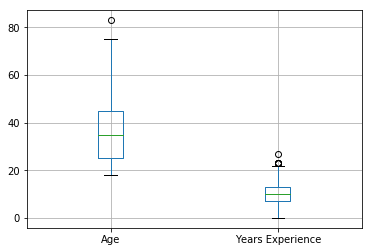

In [35]:
# Create a boxplot of two columns
so_numeric_df_num[['Age', 'Years Experience']].boxplot()
plt.show()

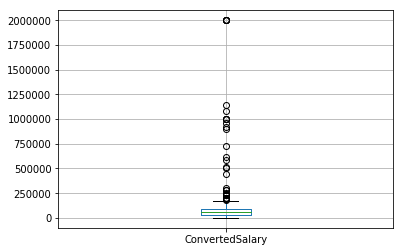

In [36]:
# Create a boxplot of ConvertedSalary
so_numeric_df_num[["ConvertedSalary"]].boxplot()
plt.show()

# What does your data look like? (II)


C:\Users\SMIT SHAH\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SMIT SHAH\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


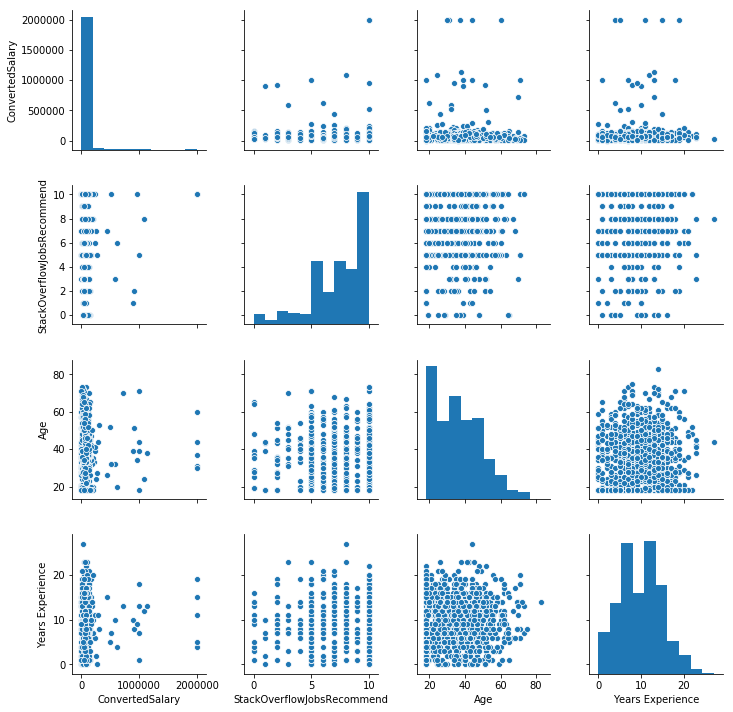

In [38]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df_num)

# Show plot
plt.show()

In [39]:
# Print summary statistics
print(so_numeric_df_num.describe())

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


# Normalization


In [43]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df_num[['Age']])

# Transform the data using the fitted scaler
so_numeric_df_num['Age_MM'] = MM_scaler.transform(so_numeric_df_num[['Age']])

# Compare the origional and transformed column
print(so_numeric_df_num[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


# Standardization


In [45]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
ss_scaler = StandardScaler()

# Fit SS_scaler to the data
ss_scaler.fit(so_numeric_df_num[['Age']])

# Transform the data using the fitted scaler
so_numeric_df_num['Age_SS'] = ss_scaler.transform(so_numeric_df_num[['Age']])

# Compare the origional and transformed column
print(so_numeric_df_num[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


# Log transformation


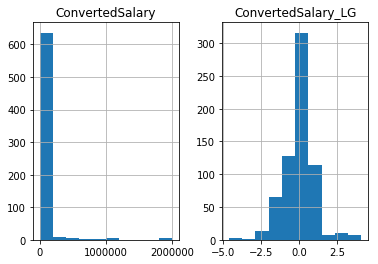

In [47]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df_num[["ConvertedSalary"]])

# Apply the power transform to the data
so_numeric_df_num['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df_num[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df_num[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

# Percentage based outlier removal


In [ ]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].____(____)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < ____]

# The original histogram
so_numeric_df[['ConvertedSalary']].____()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].____()
plt.show()

# Statistical outlier removal


In [ ]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].____
mean = so_numeric_df['ConvertedSalary'].____

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, ____

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < ____) \ 
                           & (so_numeric_df['ConvertedSalary'] > ____)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

# Train and testing transformations (I)


In [87]:
so_train_numeric=so_numeric_df.loc[:700,:]
so_test_numeric=so_numeric_df.iloc[700:,:]

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = ____

# Fit the standard scaler to the data
____

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = ____
print(so_test_numeric[['Age', 'Age_ss']].head())

# Train and testing transformations (II)


In [ ]:
train_std = so_train_numeric['ConvertedSalary'].____
train_mean = so_train_numeric['ConvertedSalary'].____

cut_off = train_std * 3
train_lower, train_upper = ____, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < ____) \
                             & (so_test_numeric['ConvertedSalary'] > ____)]

# Cleaning up your text


In [91]:
speech_df=pd.read_csv("inaugural_speeches.csv")

In [ ]:
# Print the first 5 rows of the text column
print(____)

In [ ]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].____('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.____

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

# High level text features


In [ ]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].____

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].____

# Find the average length of word
speech_df['avg_word_length'] = ____ / ____

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

# Counting words (I)


In [ ]:
# Import CountVectorizer
____

# Instantiate CountVectorizer
cv = ____

# Fit the vectorizer
cv.____(speech_df['text_clean'])

# Print feature names
print(cv.____)

# Counting words (II)


In [ ]:
# Apply the vectorizer
cv_transformed = ____(speech_df['text_clean'])

# Print the full array
cv_array = ____
print(cv_array)

# Print the shape of cv_array
print(____)

# Limiting your features


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = ____

# Fit, transform, and convert into array
cv_transformed = ____(speech_df['text_clean'])
cv_array = ____

# Print the array shape
print(____)

# Text to DataFrame


In [ ]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(____, 
                     columns=____).____('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = ____([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

# Tf-idf


In [ ]:
# Import TfidfVectorizer
____

# Instantiate TfidfVectorizer
tv = ____

# Fit the vectroizer and transform the data
tv_transformed = ____(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.____, 
                     columns=tv.____).add_prefix('TFIDF_')
print(tv_df.head())

# Inspecting Tf-idf values


In [ ]:
# Isolate the row to be examined
sample_row = tv_df.____

# Print the top 5 words of the sorted output
print(sample_row.____(ascending=____).____())

# Transforming unseen data


In [103]:
train_speech_df=speech_df.iloc[:45,:]
test_speech_df=speech_df.iloc[45:,:]

In [ ]:
# Instantiate TfidfVectorizer
tv = ____(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = ____

# Transform test data
test_tv_transformed = ____

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.____, 
                          columns=tv.____).add_prefix('TFIDF_')
print(test_tv_df.head())

# Using longer n-grams


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import ____

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ____)

# Fit and apply trigram vectorizer
cv_trigram = ____(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.____)

# Finding the most common words


In [ ]:
# Create a DataFrame of the features
cv_tri_df = ____(____, 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().____(ascending=____).head())